In [1]:
import pandas as pd
wine=pd.read_csv(r"C:\Users\POPO\Desktop\wine.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


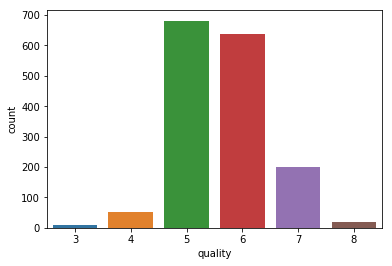

In [3]:
import seaborn as sns
sns.countplot(wine['quality'])

In [4]:
wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
def transform(x):
    if x<5:
        return 0
    elif x>6:
        return 2
    else:
        return 1

In [6]:
wine["newquality"]=wine["quality"].apply(transform)

In [7]:
wine["newquality"].value_counts()

1    1319
2     217
0      63
Name: newquality, dtype: int64

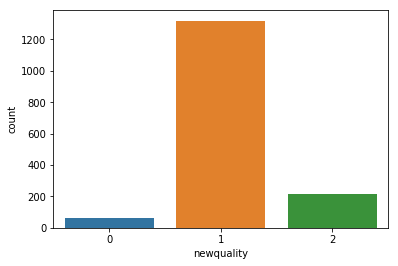

In [8]:
sns.countplot(wine["newquality"])

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

C:\Users\POPO\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
train_data , test_data , train_label , test_label = train_test_split(wine.iloc[:,:11],wine["newquality"],test_size=0.2)

In [12]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(train_data)

X_train = scaler.transform(train_data)  
X_test = scaler.transform(test_data) 

In [13]:
knn = KNeighborsClassifier()

In [14]:
from sklearn.neighbors import KNeighborsClassifier  

In [15]:
error = []
import numpy as np
# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, train_label)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != test_label))

Text(0,0.5,'Mean Error')

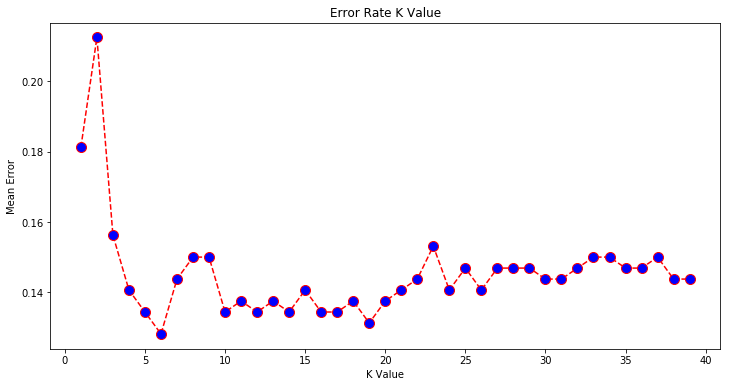

In [16]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [17]:
classifier = KNeighborsClassifier(n_neighbors=6)  
classifier.fit(X_train, train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
error=sum(y_pred!=test_label)/len(test_label)
print("error =",error)

error = 0.128125


# 若label不做轉換

In [20]:
train_data , test_data , train_label , test_label = train_test_split(wine.iloc[:,:11],wine["quality"],test_size=0.2)

In [21]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(train_data)
X_train = scaler.transform(train_data)  
X_test = scaler.transform(test_data)

In [22]:
knn = KNeighborsClassifier()

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
error = []
import numpy as np
# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, train_label)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != test_label))

Text(0,0.5,'Mean Error')

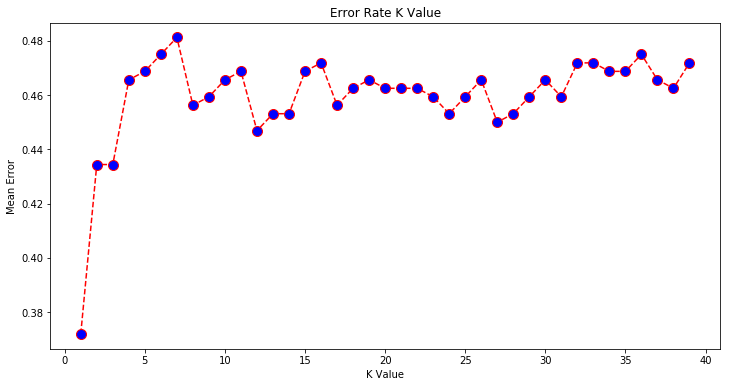

In [25]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [26]:
classifier = KNeighborsClassifier(n_neighbors=1)  
classifier.fit(X_train, train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
error=sum(y_pred!=test_label)/len(test_label)
print("error =",error)

error = 0.371875
